In [72]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import numpy as np 
import matplotlib.pyplot as plt

In [73]:
def F(x):
    return x ** 2 * (1 + abs(np.sin(80 * x)))

In [74]:
x_space = np.linspace(-2, 2, 1000)

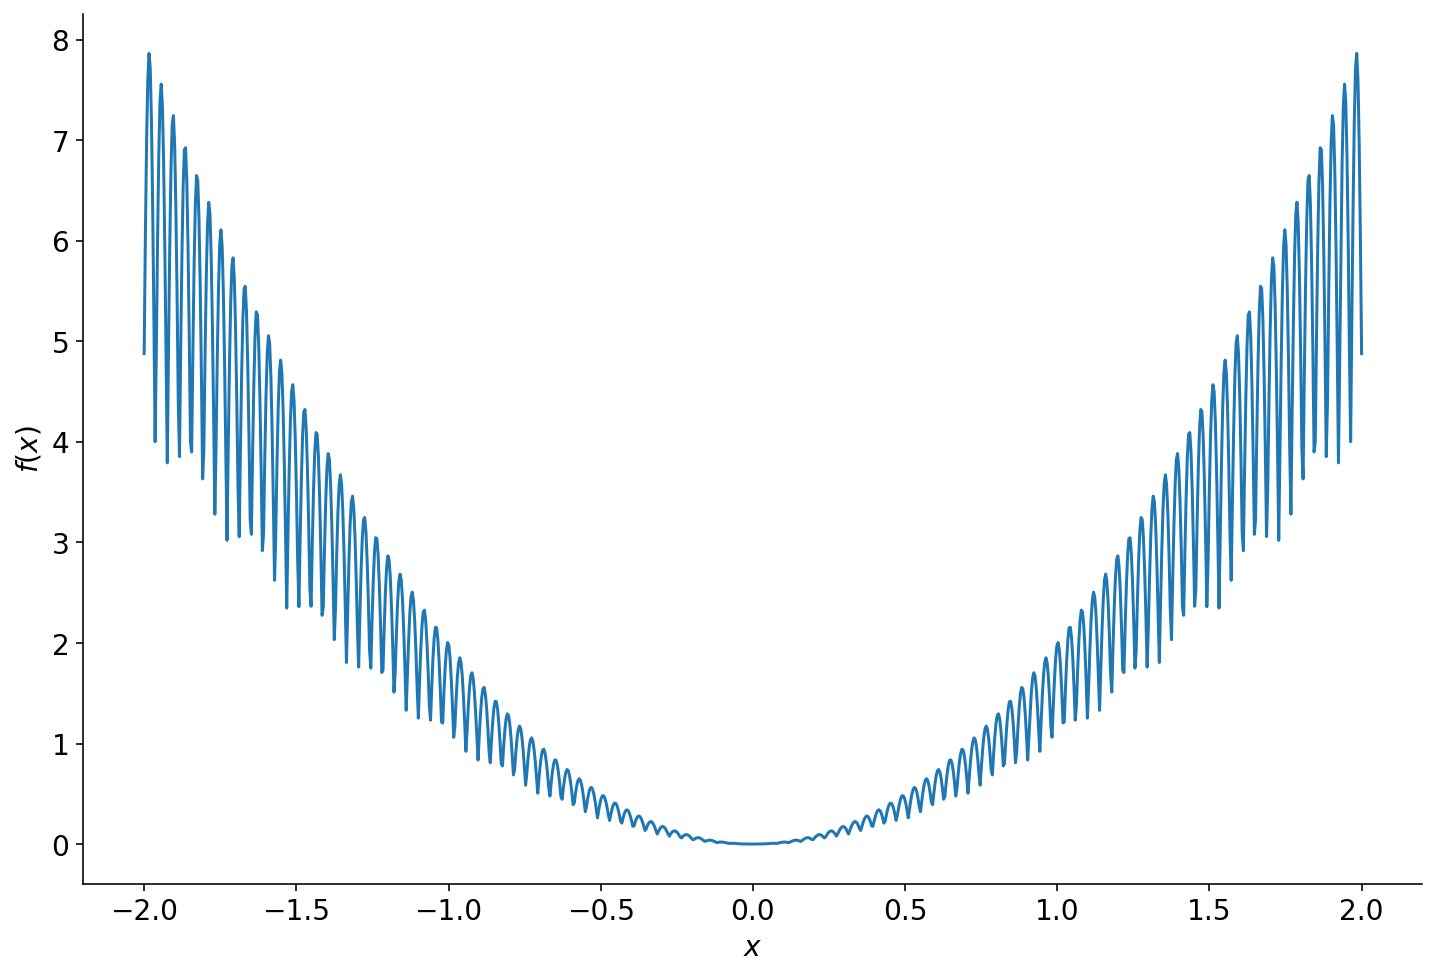

In [75]:
fig = plt.figure(figsize=(12, 8))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("$x$", fontsize=14)  
plt.ylabel("$f(x)$", fontsize=14)

plt.plot(x_space, F(x_space))

In [76]:
fig.savefig("func_min.png", bbox_inches='tight', dpi=600)

In [98]:
def SA_adj(space, T, epsilon):
    np.random.seed(777)
    x_hat = np.random.choice(space)
    history = list()
    history.append(x_hat)
    T_0 = T
    k = 1
    while True:
        x_tilda = np.random.normal(x_hat, T) # Используем семейство нормальных распределений в качестве функции G
        delta = F(x_tilda) - F(x_hat)
        prob = np.exp(- delta / T)
        
        if (delta < 0) or (prob >= np.random.random()):
            x_hat = x_tilda
            history.append(x_hat)
            
            if (x_hat < epsilon) and (x_hat > 0):
                return x_hat, history
            
        T = T_0/ np.log(1 + k) # Больцмановский отжиг

In [111]:
%timeit x_opt_1, h_1 = SA_adj(x_space, T=0.1, epsilon=10 ** -1)

681 µs ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [112]:
%timeit x_opt_2, h_2 = SA_adj(x_space, T=0.1, epsilon=10 ** -2)

1.8 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [113]:
%timeit x_opt_4, h_4 = SA_adj(x_space, T=0.1, epsilon=10 ** -4)

35 ms ± 5.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
%timeit x_opt_6, h_6 = SA_adj(x_space, T=0.1, epsilon=10 ** -4)

32.5 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


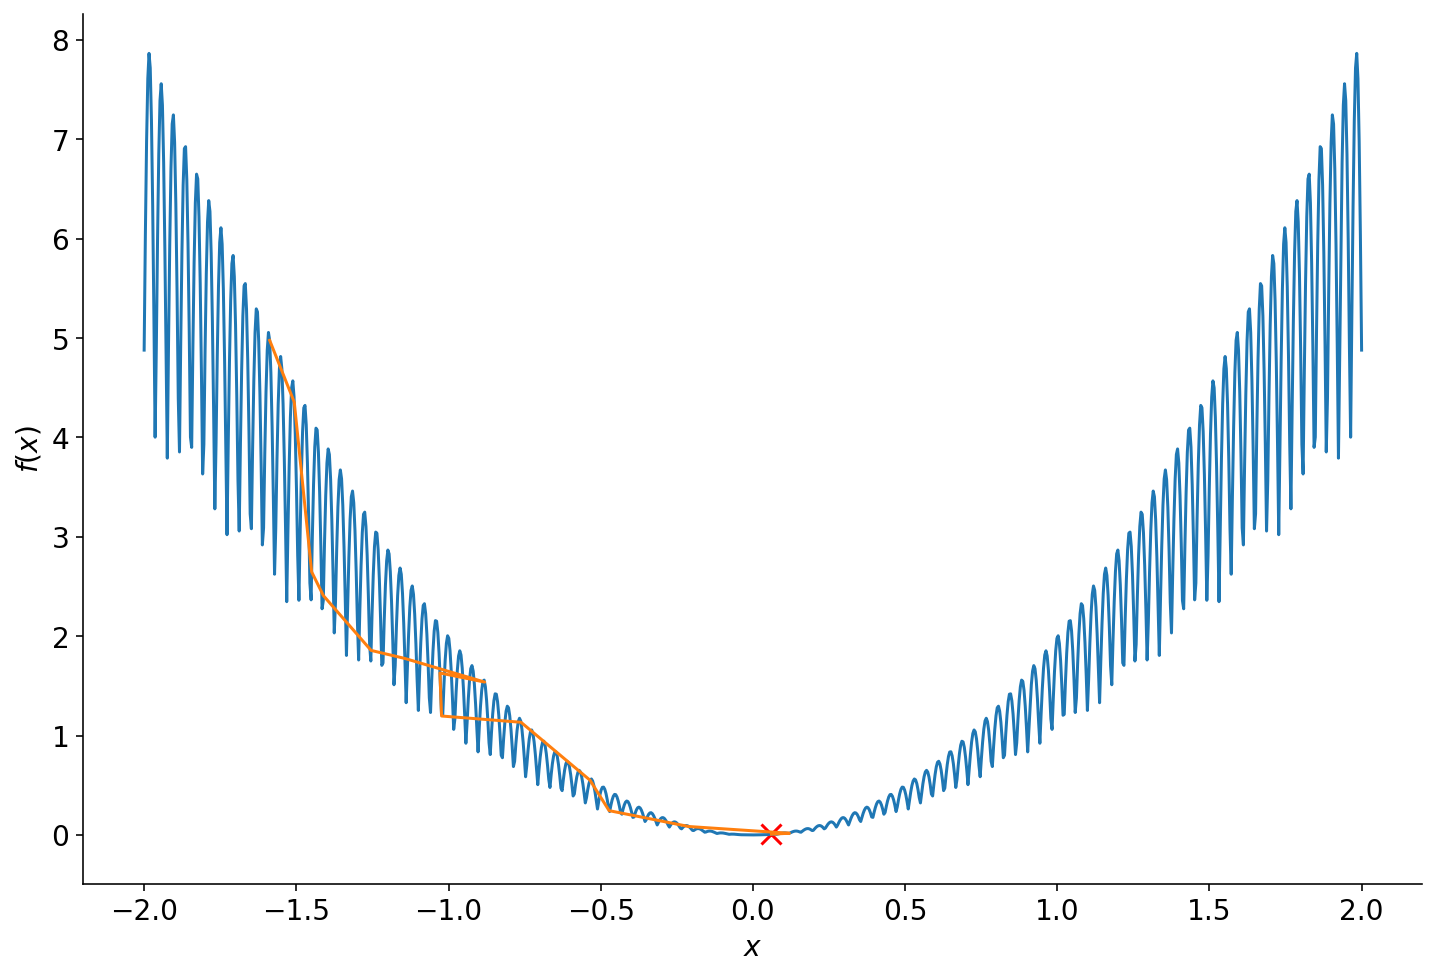

In [103]:
fig = plt.figure(figsize=(12, 8))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("$x$", fontsize=14)  
plt.ylabel("$f(x)$", fontsize=14)

plt.plot(x_space, F(x_space))
plt.scatter(x_opt_1, F(x_opt_1), marker="x", color="red", s=100)
plt.plot(h_1, F(np.asarray(h_1)))

In [104]:
fig.savefig("func_min1.png", bbox_inches='tight', dpi=600)

Text(0.5, 0, '$x$')

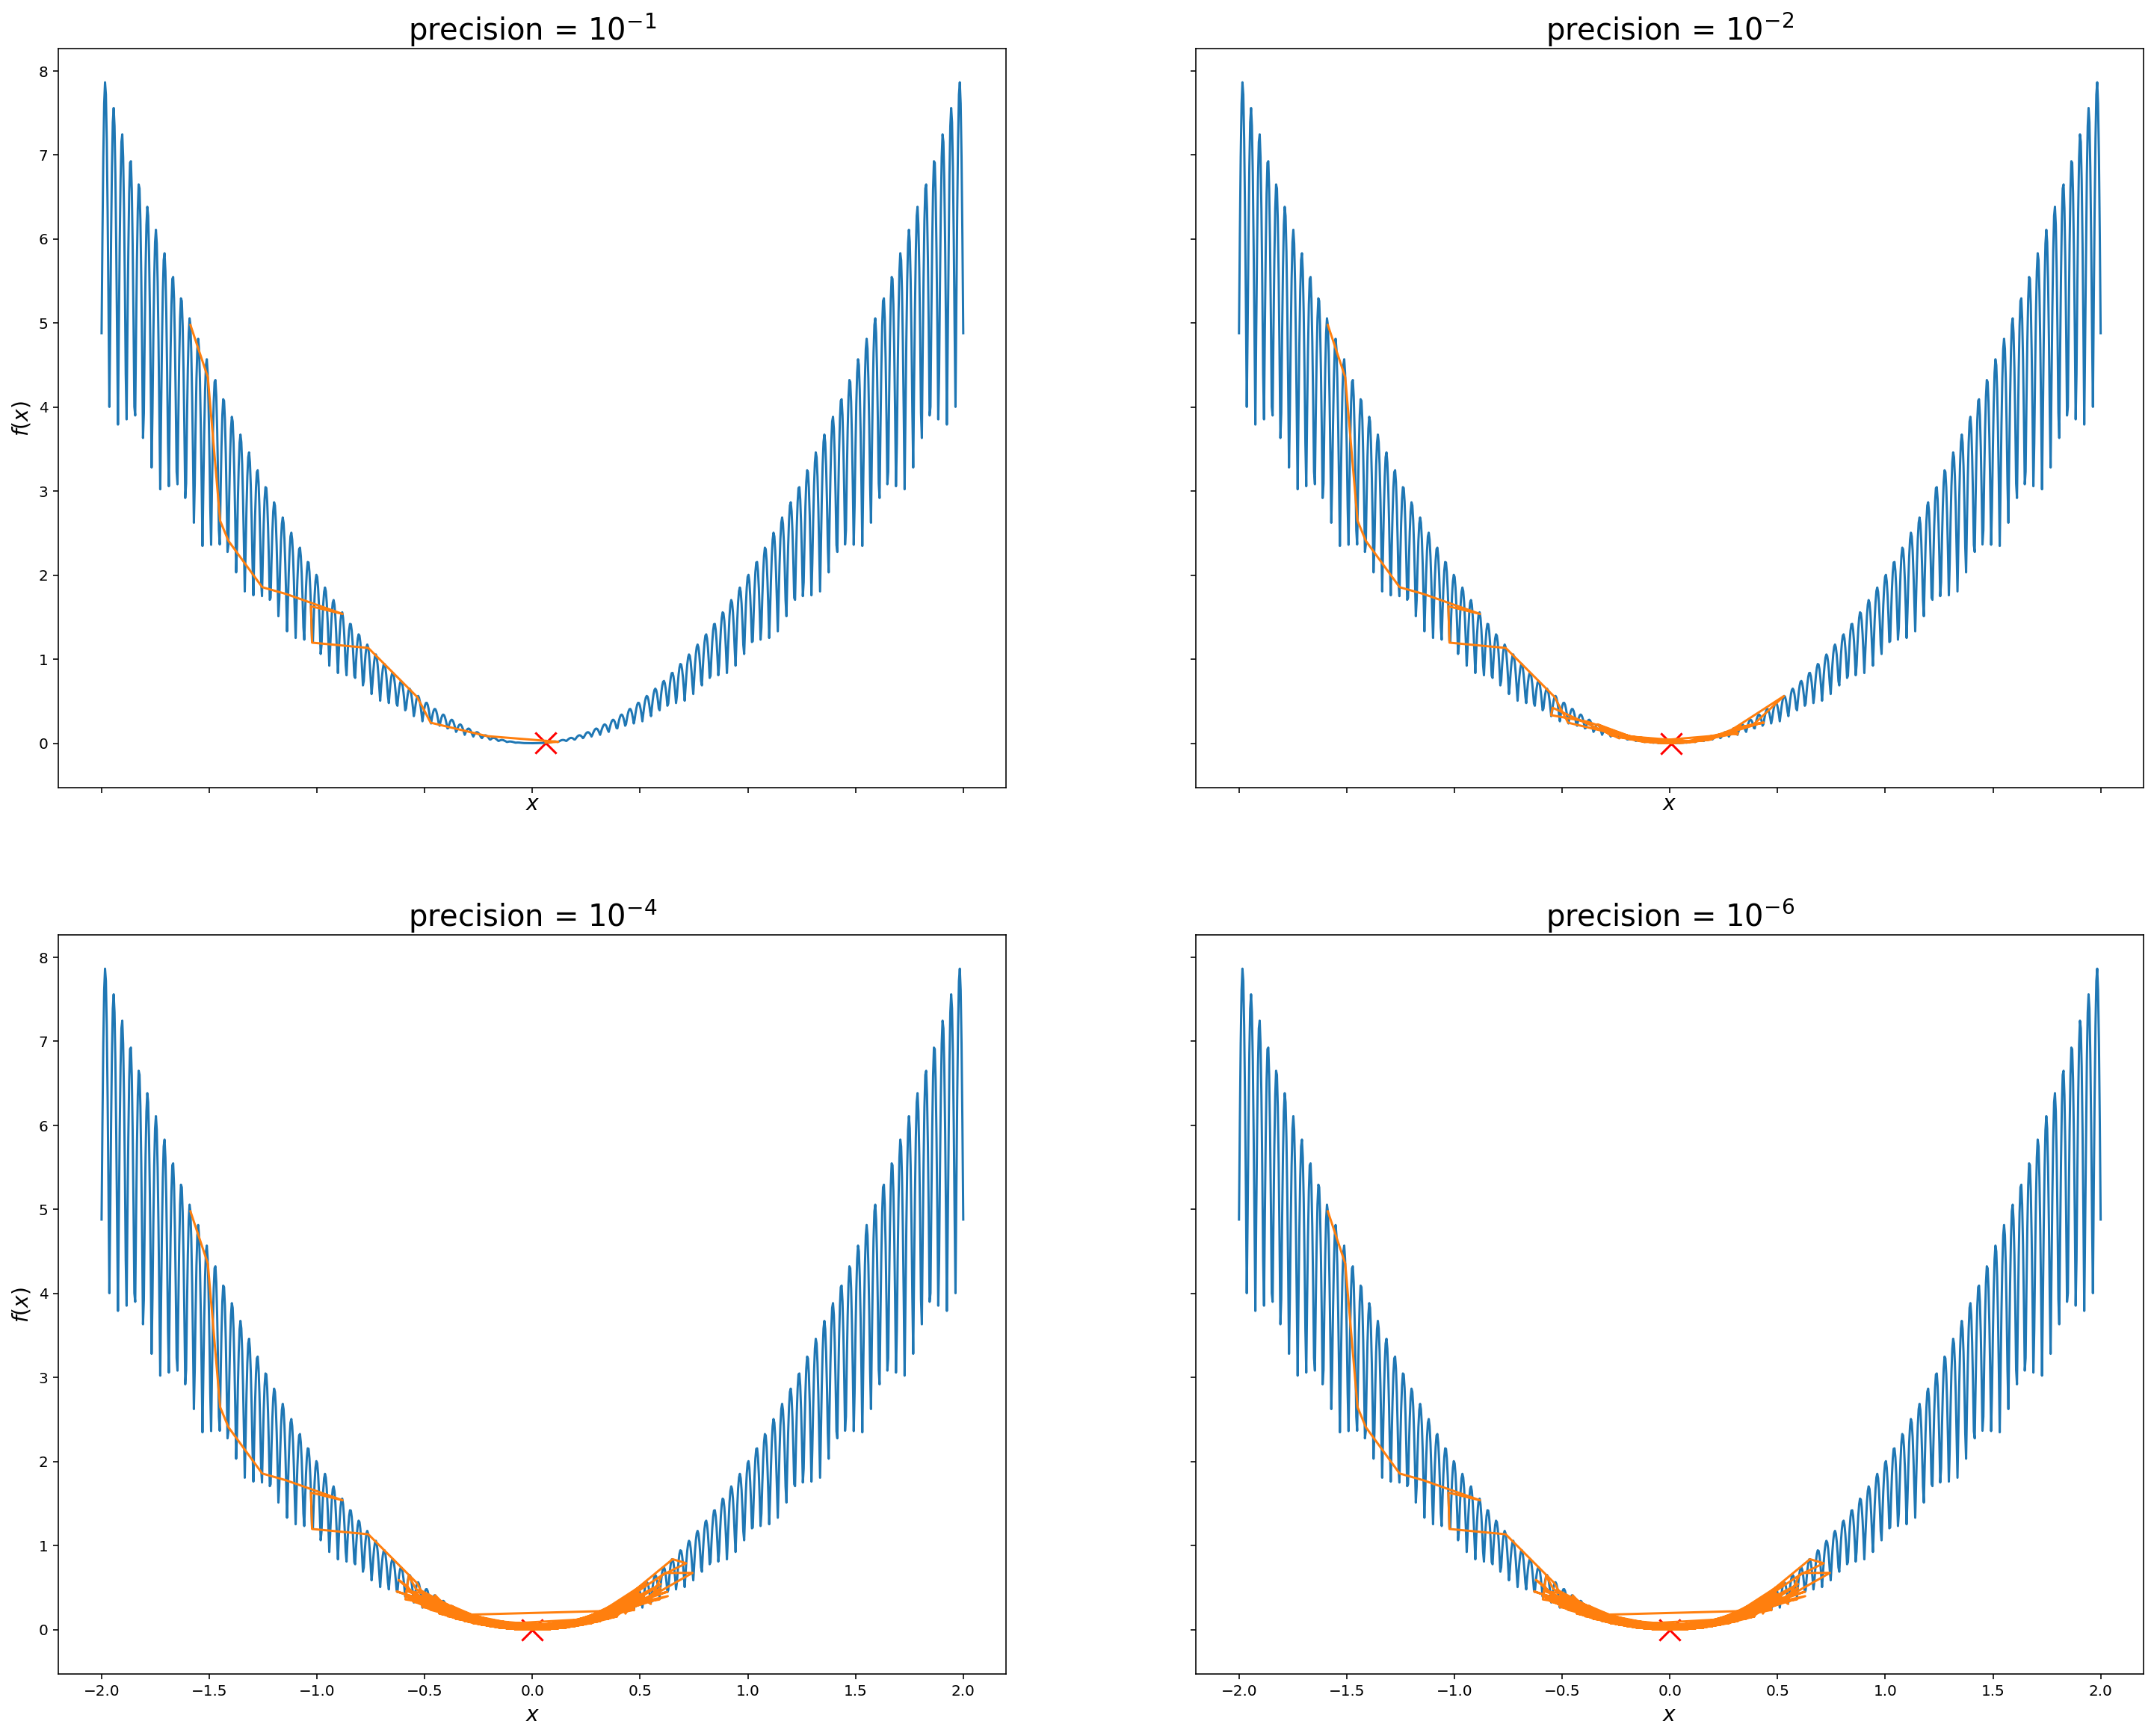

In [105]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(25, 20))

ax[0, 0].set_title("precision = $10^{-1}$", fontsize=20)
ax[0, 0].plot(x_space, F(x_space))
ax[0, 0].scatter(x_opt_1, F(x_opt_1), marker="x", color="red", s=200)
ax[0, 0].plot(h_1, F(np.asarray(h_1)))
ax[0, 0].set_ylabel('$f(x)$', fontsize=14)
ax[0, 0].set_xlabel('$x$', fontsize=14)

ax[0, 1].set_title("precision = $10^{-2}$", fontsize=20)
ax[0, 1].plot(x_space, F(x_space))
ax[0, 1].scatter(x_opt_2, F(x_opt_2), marker="x", color="red", s=200)
ax[0, 1].plot(h_2, F(np.asarray(h_2)))
ax[0, 1].set_xlabel('$x$', fontsize=14)

ax[1, 0].set_title("precision = $10^{-4}$", fontsize=20)
ax[1, 0].plot(x_space, F(x_space))
ax[1, 0].scatter(x_opt_4, F(x_opt_4), marker="x", color="red", s=200)
ax[1, 0].plot(h_4, F(np.asarray(h_4)))
ax[1, 0].set_ylabel('$f(x)$', fontsize=14)
ax[1, 0].set_xlabel('$x$', fontsize=14)

ax[1, 1].set_title("precision = $10^{-6}$", fontsize=20)
ax[1, 1].plot(x_space, F(x_space))
ax[1, 1].scatter(x_opt_6, F(x_opt_6), marker="x", color="red", s=200)
ax[1, 1].plot(h_6, F(np.asarray(h_6)))
ax[1, 1].set_xlabel('$x$', fontsize=14)

In [26]:
fig.savefig("func_min2.png", bbox_inches='tight', dpi=600)